# Funciones en R



Vamos a crear nuestra primera función para sumar dos números.

In [1]:
restaDosNumeros<-function(x,y){
    z<-x-y
    return(z)
}

In [2]:
restaDosNumeros(10,7)

[1] 3

Podemos referenciar los parámetros por nombre:

In [5]:
restaDosNumeros(y=10,x=7)

[1] -3

Podemos definir parámetros opcionales con un valor por defecto.

In [9]:
restaDosNumerosConEscala<-function(x,y,scale = 1){
    (x-y)*scale
}

In [10]:
restaDosNumerosConEscala(10,7)

[1] 3

In [11]:
restaDosNumerosConEscala(10,7,5)

[1] 15

Las funciones en R son objetos como puede ser un número, un vector o un data frame.

In [3]:
ls()

[1] "restaDosNumeros"

Podemos ver su contenido llamando al nombre del objeto, sin paréntesis.

In [4]:
restaDosNumeros

function(x,y){
    z<-x-y
    return(z)
}

## Estimador estadístico

Vamos a ver varios ejemplos de funciones en R utilizando estimadores estadísticos.

Un [estimador](https://es.wikipedia.org/wiki/Estimador) es un estadístico (esto es, una función de la muestra) usado para estimar un parámetro desconocido de la población.

Un estimador es una función que coje valores de una muestra de datos y hace un resumen, **estima un valor que define la muestra**.

Como ejemplo de población utilizaremos el siguiente vector de alturas:

In [2]:
alturas<-c(1.80,1.60,1.50,1.90,1.75,1.63,1.65)

### Media aritmética

En matemáticas y estadística, la [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) (también llamada promedio o media) de un conjunto finito de números es el valor característico de una serie de datos cuantitativos, objeto de estudio que parte del principio de la esperanza matemática o valor esperado, se obtiene a partir de la suma de todos sus valores dividida entre el número de sumandos. 

\\[ \bar{x} =  \frac{1}{N} \sum _{i=1}^N x_i\\]

En R la función de la media se podría definir así:

In [16]:
myMean<-function(X){
    m<-0
    for (xi in X){
        m<-m+xi
    }
    m/length(X)
}

In [17]:
myMean(alturas)

[1] 1.69

Evidentemente R tiene una función para la media cuya ejecución es mucho más rápida que nuestra función:

In [19]:
mean(alturas)

[1] 1.69

### Media geométrica

La [media geométrica](https://es.wikipedia.org/wiki/Media_geom%C3%A9trica) de una cantidad arbitraria de números (por decir n números) es la raíz n-ésima del producto de todos los números.

\\[  \sqrt[N] {\prod _{i=1}^N x_i }\\]

In [117]:
myGeometricMean<-function(X,na.rm=F){
    if (na.rm){
        X<-na.omit(X)
    }
    m<-1
    for (xi in X){
        m<-m*xi        
    }
    m^(1/length(X))
}

**¿Cual es el TAE medio en el cambio Bitcoins en doláres desde 2011?**

En la siguiente tabla podemos ver el precio a final de cada año, junto con su revalorización porcentual durante ese año.

In [142]:
year<-c(2010,2011,2012,2013,2014,2015,2016,2017)
value<-c(0.3, 4.7,13.2,760,316,430,980,12000)
ratio<-c(NA,value[2:length(value)]/value[1:length(value)-1])
rate<-(ratio-1)*100

bitcoinValue<-data.frame(año=year,valor=value,TAE=round(rate,2),ratio=round(ratio,4))
bitcoinValue

año,valor,TAE,ratio
2010,0.3,NA,NA
2011,4.7,1466.67,15.6667
2012,13.2,180.85,2.8085
2013,760.0,5657.58,57.5758
2014,316.0,-58.42,0.4158
2015,430.0,36.08,1.3608
2016,980.0,127.91,2.2791
2017,12000.0,1124.49,12.2449


In [132]:
print(paste0("La media aritmética de todos los interes TAE es: ",
             round(mean(bitcoinValue$TAE,na.rm=T),2),"%"))

[1] "La media aritmética de todos los interes TAE es: 1219.31%"


In [143]:
realTAEmean<-(myGeometricMean(bitcoinValue$ratio,na.rm=T)-1)*100
print(paste0("La media real de todos los interes TAE es:",
             round(realTAEmean,2),"%"))

[1] "La media real de todos los interes TAE es:354.4%"


In [160]:
initialAmount<-10

print(paste0("Si hubieramos invertido $",initialAmount," a un interés del ",round(realTAEmean,2),
             "% TAE, 7 años después tendríamos $", round(initialAmount*(realTAEmean/100+1)^7)))

[1] "Si hubieramos invertido $10 a un interés del 354.4% TAE, 7 años después tendríamos $400027"


![Imagen no cargada. Edita y borra la @ ](http://confidenceisquiet.com/wp-content/uploads/2017/10/Compound-Interest-Einstein-768x347.png @ )


![Imagen no cargada. Edita y borra la @ ](http://weknowmemes.com/wp-content/uploads/2012/07/dont-believe-everything-you-see-on-the-internet.jpg @ )


### Varianza / desviación típica

La [variancia](https://es.wikipedia.org/wiki/Varianza) (que suele representarse como $\sigma ^{2}$,$s^2$ o $Var(X)$) de una variable aleatoria es una medida de dispersión definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media. O en pocas palabras, es la media de los residuos al cuadrado.

Es decir, define lo mucho que varía una variable aleatoria respecto a la media:
* Si todos los valores son iguales, no hay variación, la varianza es 0.
* Si los valores son muy diferentes unos de otros la varianza es alta.

La raíz cuadrada de la *varianza* es la **desviación típica** que indica **como de típica es la desviación respecto a la media en sus mismas unidades**.

\\[ Var[x] =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2 \\]



En R la función de la varianza se podría definir así:

In [29]:
myVar<-function(X){
    v<-0
    m<-mean(alturas)
    for (xi in X){
        v<-v+(xi-m)^2
    }
    v/length(X)
}

In [30]:
print(paste("La varianza es:",myVar(alturas)))
print(paste("La desviación típica es:",sqrt(myVar(alturas))))

[1] "La varianza es: 0.0156"
[1] "La desviación típica es: 0.124899959967968"


Evidentemente R tiene una función para la varianza (*var*) y la desviación típica (*sd*) cuya ejecución es mucho más rápida que nuestra función:

In [31]:
print(paste("La varianza es:",var(alturas)))
print(paste("La desviación típica es:",sd(alturas)))

[1] "La varianza es: 0.0182"
[1] "La desviación típica es: 0.13490737563232"


La varianza es un estimador sesgado y R utiliza la fórmula del estimador no sesgado. Veremos que significa eso en el futuro.

#### Desigualdad de Chebyshev (Нера́венство Чебышёва)

La desigualdad de Chebyshev es un resultado que ofrece una cota inferior a la probabilidad de que el valor de una variable aleatoria con varianza finita esté a una cierta distancia de su esperanza matemática.

\\[ Pr\left( |X-\bar{x}| \geq k · \sigma \right) \leq \frac{1}{k^2} \\] 

O dicho de otras palabras, la probabilidad de que haya valores **fuera** del intervalo $\left[ \bar{x}-k\sigma, \bar{x}+k\sigma \right]$ es menor o igual a $1/{k^2}$.

In [11]:
k<-seq(from=1,to=5,by=0.5)
margen<-data.frame(limite_inf=mean(alturas)-k*sd(alturas),limite_sup=mean(alturas)+k*sd(alturas),prob=1/k^2,k=k)

margen

limite_inf,limite_sup,prob,k
1.555093,1.824907,1.00000000,1.0
1.487639,1.892361,0.44444444,1.5
1.420185,1.959815,0.25000000,2.0
1.352732,2.027268,0.16000000,2.5
1.285278,2.094722,0.11111111,3.0
1.217824,2.162176,0.08163265,3.5
1.150370,2.229630,0.06250000,4.0
1.082917,2.297083,0.04938272,4.5
1.015463,2.364537,0.04000000,5.0


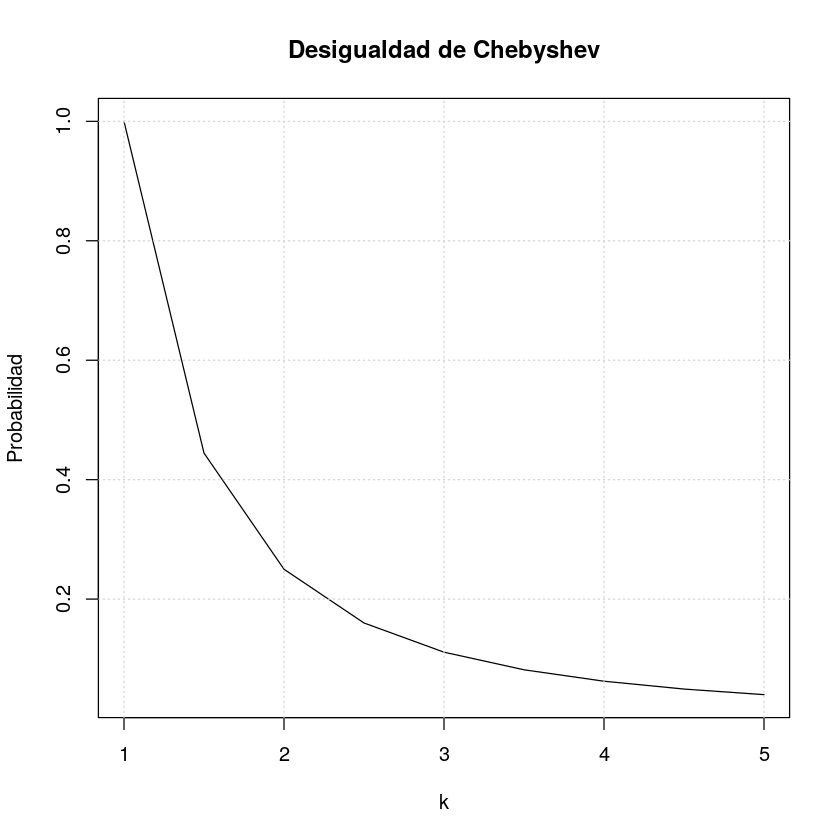

In [154]:
plot(margen$k,margen$prob,t='l',xlab="k",ylab="Probabilidad",main="Desigualdad de Chebyshev")
grid()

La desigualdad de Chebyshev es un límite muy pesimista, se pueden obtener mejores resultados cuando la distribución es conocida.

### Mediana

La mediana es el valor de una distribución tal que la mitad de los elementos son superiores y la mitad son inferiores.

In [50]:
myMedian<-function(x){
    x<-sort(x)
    i<-(length(x)+1)/2    
    if (round(i)==i){
        x[i]
    }else{
        (x[floor(i)]+x[ceiling(i)])/2
    }    
}

In [51]:
myMedian(alturas)

[1] 1.65

Como siempre es aconsejable utilizar la función que R ha preparado

In [52]:
median(alturas)

[1] 1.65

### Quartiles

Los [cuartiles](https://es.wikipedia.org/wiki/Cuartil) son los tres valores que dividen un conjunto de datos ordenados en cuatro partes porcentualmente iguales.
* Q1: El 25% de las muestras se encuentran por debajo del primer cuartil.
* Q2: El 50% de las muestras se encuentran por debajo del segundo cuartil. Este valor también se le conoce como *mediana*
* Q3: El 75% de las muestras se encuentran por debajo del tercer cuartil.

Una forma muy práctica de mostrar estos valores es con el diagrama de cajas (boxplot en inglés).

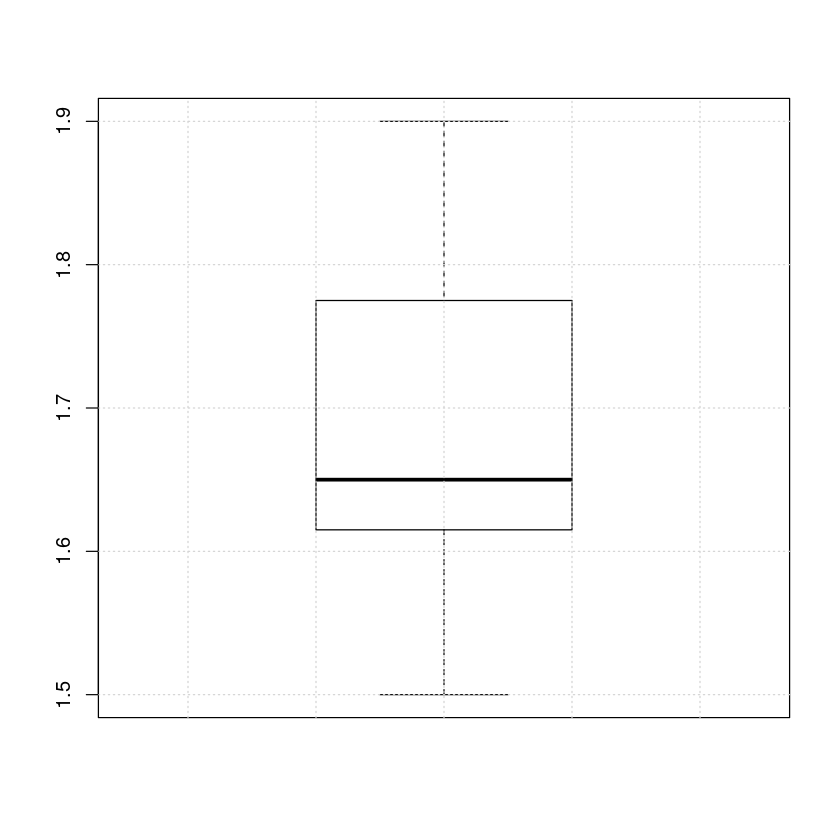

In [59]:
boxplot(alturas)
grid()

### Quantiles o percentiles

El percentil indica el porcentaje de muestras que se encuentran debajo de un umbral dado. Es igual al cuantil, solo que este está dado en tanto por 1 mientras que el percentil está dado en tanto por ciento.

En R tenemos la función *quantile()*

In [61]:
quantile(alturas,0.9)

90% 
1.84


### Moda

Es el valor con mayor frecuencia en una distribución